In [16]:
from fileinput import filename
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd

#initialize dataframe
df_main=pd.DataFrame()
datadir="data"

#semi channel height
DELTA=1.0

for dir in os.listdir(path=datadir):
    
    temp = dict()
    name,mesh =dir.split(sep="_")

    #TODO
    #"""
    types=["lowRe","highRe"]
    Re_taus=[550.0,9e4] #calculated using the approx formula of the pope book Re_tau=0.09*Re^0.88
    Res=[20e3,6.67e6]
    nus=[1e-4,3e-7]
    for i,type in enumerate(types):
        if type in name:
            RE_TAU=Re_taus[i]
            NU=nus[i]
            U_TAU=RE_TAU*NU/DELTA
            #print(U_TAU)
            temp["nu"]=NU
            temp["Re_tau"]=Re_taus[i]
            temp["type"]= type
            temp["model_name"] = name.removeprefix(type)
    #    """
    #temp["model_name"] = name
    temp["mesh"] = mesh
    
    path=datadir+'/'+dir
    for dir2 in os.listdir(path=path):
        path2=path+'/'+dir2

        if dir2 == "yPlus":
            filename=path2+'/0/yPlus.dat'
            #iter,patch,max,min,average=np.loadtxt(filename,skiprows=1,comments=None,unpack=True)
            yPlus=np.loadtxt(filename,skiprows=2,usecols=4,comments="#")
            temp["yPlus_average"]=yPlus[-1]

        if dir2 == "yProfilesGraph":
            dirs=os.listdir(path=path2)
            iters = [int(temp) for temp in dirs]

            finalIter=max(iters)
            path3=path2+'/'+str(finalIter)
            file=os.listdir(path=path3)
            filename=path3+'/'+file[0]
            y,epsilon,k,nut,Ux=np.loadtxt(filename,skiprows=1,usecols=(0,1,2,3,4),
                                unpack=True,delimiter=",")
            """
            # in wall units
            temp["y"]=y*RE_TAU/DELTA
            temp["epsilon"]=epsilon*DELTA/(RE_TAU * U_TAU**3)
            temp["k"]=k/(U_TAU*U_TAU)
            temp["nut"]=nut*RE_TAU/DELTA/U_TAU
            temp["U"]=Ux/U_TAU
            """
            # phisical units
            temp["y"]=y
            temp["epsilon"]=epsilon
            temp["k"]=k
            temp["nut"]=nut
            temp["U"]=Ux

    df_temp=pd.DataFrame(temp)
    df_main=pd.concat([df_main,df_temp],ignore_index=True,copy=True)

print(df_main.size)


0.055
0.055
0.027
0.055
0.055
0.027
0.055
0.055
0.055
0.027
0.055
0.027
22506


<AxesSubplot:xlabel='y'>

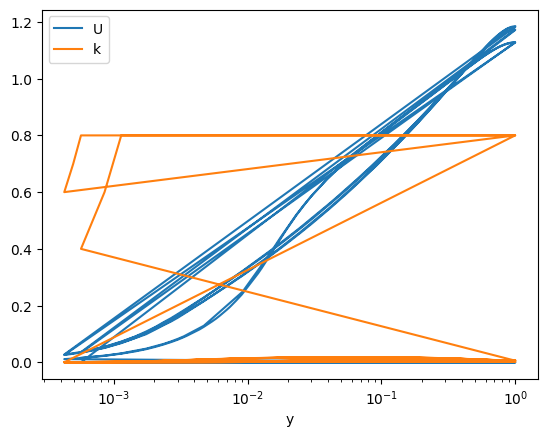

In [21]:
df_main[df_main["type"]=="lowRe"].plot.line(x='y',y=['U','k'],logx=True)